In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import fa_support
import evall
import random

In [12]:
train =  np.load("new_fa_train_data.npy")
#test = np.load("new_fa_test_data.npy")


In [13]:
numbers = [  310, 8, 53, 3, 13, 4, 3, 78]
names = ['brand_id',
         'category', 'colour', 'divisioncode', 'itemcategorycode',
         'itemfamilycode', 'itemseason', 'productgroup']
dic = dict(zip(names,numbers))

In [14]:
eval_dic =pd.read_csv("Eval_dic", index_col=0)

In [15]:
eval_dic

,WGAN,WGAN-GP_100_epochs_lr_0.0001,GAN_lr.0001_extrastep_1
0,0.431059,0.478360,0.250895
1,0.475948,0.524330,0.288934
2,0.354883,0.394489,0.200178
3,0.378315,0.421206,0.216806
4,0.311600,0.350700,0.179600
5,0.338500,0.375900,0.203800


In [16]:
user_emb_dim = sum(dic.values())

D_emb_dim = 50

G_emb_dim = 50

hidden_dim = 128
alpha = 0

# Initializer
init = tf.initializers.glorot_normal()

'''Generator and Discriminator Attribute Embeddings'''
#D_price_embs = tf.keras.layers.Embedding(input_dim = dic['pricetype'], output_dim = D_emb_dim,
 #                                         trainable=True, weights = [init(shape=( dic['pricetype'],D_emb_dim))])
D_brand_embs = tf.keras.layers.Embedding(input_dim = dic['brand_id'], output_dim = D_emb_dim,
                                          trainable=True, weights = [init(shape=( dic['brand_id'],D_emb_dim))])
D_category_embs = tf.keras.layers.Embedding(input_dim = dic['category'], output_dim = D_emb_dim,
                                          trainable=True, weights = [init(shape=( dic['category'],D_emb_dim))])
D_colour_embs = tf.keras.layers.Embedding(input_dim = dic['colour'], output_dim = D_emb_dim,
                                          trainable=True, weights = [init(shape=( dic['colour'],D_emb_dim))])
D_div_embs = tf.keras.layers.Embedding(input_dim = dic['divisioncode'], output_dim = D_emb_dim,
                                          trainable=True, weights = [init(shape=( dic['divisioncode'],D_emb_dim))])
D_itemcat_embs = tf.keras.layers.Embedding(input_dim = dic['itemcategorycode'], output_dim = D_emb_dim,
                                          trainable=True, weights = [init(shape=( dic['itemcategorycode'],D_emb_dim))])
D_itemfam_embs = tf.keras.layers.Embedding(input_dim = dic['itemfamilycode'], output_dim = D_emb_dim,
                                          trainable=True, weights = [init(shape=( dic['itemfamilycode'],D_emb_dim))])
D_season_embs = tf.keras.layers.Embedding(input_dim = dic['itemseason'], output_dim = D_emb_dim,
                                          trainable=True, weights = [init(shape=( dic['itemseason'],D_emb_dim))])
D_prod_embs = tf.keras.layers.Embedding(input_dim = dic['productgroup'], output_dim = D_emb_dim,
                                          trainable=True, weights = [init(shape=( dic['productgroup'],D_emb_dim))])


#G_price_embs = tf.keras.layers.Embedding(input_dim = dic['pricetype'], output_dim = G_emb_dim,
#                                               trainable=True, weights = [init(shape=( dic['pricetype'],G_emb_dim))])
G_brand_embs = tf.keras.layers.Embedding(input_dim = dic['brand_id'], output_dim = G_emb_dim,
                                          trainable=True, weights = [init(shape=( dic['brand_id'],G_emb_dim))])
G_category_embs = tf.keras.layers.Embedding(input_dim = dic['category'], output_dim = G_emb_dim,
                                          trainable=True, weights = [init(shape=( dic['category'],G_emb_dim))])
G_colour_embs = tf.keras.layers.Embedding(input_dim = dic['colour'], output_dim = G_emb_dim,
                                          trainable=True, weights = [init(shape=( dic['colour'],G_emb_dim))])
G_div_embs = tf.keras.layers.Embedding(input_dim = dic['divisioncode'], output_dim = G_emb_dim,
                                          trainable=True, weights = [init(shape=( dic['divisioncode'],G_emb_dim))])
G_itemcat_embs = tf.keras.layers.Embedding(input_dim = dic['itemcategorycode'], output_dim = G_emb_dim,
                                          trainable=True, weights = [init(shape=( dic['itemcategorycode'],G_emb_dim))])
G_itemfam_embs = tf.keras.layers.Embedding(input_dim = dic['itemfamilycode'], output_dim = G_emb_dim,
                                          trainable=True, weights = [init(shape=( dic['itemfamilycode'],G_emb_dim))])
G_season_embs = tf.keras.layers.Embedding(input_dim = dic['itemseason'], output_dim = G_emb_dim,
                                          trainable=True, weights = [init(shape=( dic['itemseason'],G_emb_dim))])
G_prod_embs = tf.keras.layers.Embedding(input_dim = dic['productgroup'], output_dim = G_emb_dim,
                                          trainable=True, weights = [init(shape=( dic['productgroup'],G_emb_dim))])


# Model input sizes
G_input_size =  G_emb_dim*8
D_input_size = user_emb_dim + D_emb_dim*8


In [17]:
def generator_input( brand_id, category, colour, divisioncode, itemcategorycode, itemfamilycode, itemseason, productgroup):
    emb_dic = {}
#    dic["pricetype"] = G_brand_embs(tf.constant(pricetype))
    dic["brand_id"] = G_brand_embs(tf.constant(brand_id))
    dic["category"] = G_brand_embs(tf.constant(category))
    dic["colour"] = G_brand_embs(tf.constant(colour))
    dic["divisioncode"] = G_brand_embs(tf.constant(divisioncode))
    dic["itemcategorycode"] = G_brand_embs(tf.constant(itemcategorycode))
    dic["itemfamilycode"] = G_brand_embs(tf.constant(itemfamilycode))
    dic["itemseason"] = G_brand_embs(tf.constant(itemseason))
    dic["productgroup"] = G_brand_embs(tf.constant(productgroup))
    emb = tf.keras.layers.concatenate(list(dic.values()), 1)
    return emb

# Generates user based on concatenation of all attributes
def generator():
    bc_input = tf.keras.layers.Input(shape=(G_input_size))
    x = tf.keras.layers.Dense(hidden_dim, activation ='sigmoid', kernel_regularizer = 'l2')(bc_input)
    x = tf.keras.layers.Dense(hidden_dim, activation ='sigmoid', kernel_regularizer = 'l2')(x)
    x = tf.keras.layers.Dense(user_emb_dim, activation ='sigmoid', kernel_regularizer = 'l2')(x)
    g_model = tf.keras.models.Model(bc_input, x, name = 'generator')
    return g_model
g_model = generator()

def discriminator_input( brand_id, category, colour, divisioncode, itemcategorycode, itemfamilycode, 
                        itemseason, productgroup, user_emb):
    emb_dic = {}
#    dic["pricetype"]  = D_brand_embs(tf.constant(pricetype))
    dic["brand_id"]  = D_brand_embs(tf.constant(brand_id))
    dic["category"]  = D_brand_embs(tf.constant(category))
    dic["colour"]  = D_brand_embs(tf.constant(colour))
    dic["divisioncode"]  = D_brand_embs(tf.constant(divisioncode))
    dic["itemcategorycode"]  = D_brand_embs(tf.constant(itemcategorycode))
    dic["itemfamilycode"]  = D_brand_embs(tf.constant(itemfamilycode))
    dic["itemseason"]  = D_brand_embs(tf.constant(itemseason))
    dic["productgroup"]  = D_brand_embs(tf.constant(productgroup))
    user_emb = tf.cast(user_emb, dtype=float)
    emb = tf.keras.layers.concatenate(list(dic.values()), 1)
    final_emb = tf.keras.layers.concatenate([emb, user_emb], 1)
    return final_emb

def discriminator():
    d_input = tf.keras.layers.Input(shape=(D_input_size))
    x = tf.keras.layers.Dense(hidden_dim, activation ='sigmoid', kernel_regularizer = 'l2')(d_input)
    x = tf.keras.layers.Dense(hidden_dim, activation ='sigmoid', kernel_regularizer = 'l2')(x)
    x = tf.keras.layers.Dense(1)(x)
    model = tf.keras.models.Model(d_input, x, name = 'discriminator')
    return model
d_model = discriminator()

In [18]:
'''Loss functions'''
def generator_loss(fake_user):
    return -tf.reduce_mean(fake_user)

def discriminator_loss(real, fake):
    logit = tf.reduce_mean(fake- real)
    return logit

def counter_loss(counter):
    return tf.reduce_mean(counter)

def discriminator_counter_loss(real, fake, counter):
    logit = tf.reduce_mean(real - counter - fake)
    return logit
''' Cross entropy loss means
def generator_loss(d_logits):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits, labels=tf.ones_like(d_logits)))

def discriminator_loss(real, fake):
    logit = tf.reduce_mean(fake-real)
    r = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=real, labels=tf.ones_like(real)))
    f = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake, labels=tf.zeros_like(fake)))
    return r+f

def counter_loss(counter):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=counter, labels=tf.zeros_like(counter))) '''


' Cross entropy loss means\ndef generator_loss(d_logits):\n    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits, labels=tf.ones_like(d_logits)))\n\ndef discriminator_loss(real, fake):\n    logit = tf.reduce_mean(fake-real)\n    r = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=real, labels=tf.ones_like(real)))\n    f = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake, labels=tf.zeros_like(fake)))\n    return r+f\n\ndef counter_loss(counter):\n    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=counter, labels=tf.zeros_like(counter))) '

In [19]:
ui_matrix = np.load("fa_ui_matrix.npy")

In [20]:
# WGAN Class
class WGAN(tf.keras.Model):
    def __init__(
        self,
        discriminator,
        generator,
        discriminator_extra_steps=5,
        batch_size = 1000
    ):
        super(WGAN, self).__init__()
        self.discriminator = d_model
        self.generator = g_model
        self.d_steps = discriminator_extra_steps
        self.batch_size = batch_size
        self.k = 10        
        self.index = 0 
        self.c_index = 0 
        self.gp_weight = 10
        self.eval_steps = 0
        self.max_p10 = .01 
        self.max_g10 = .01
        self.max_m10 = .01
        self.max_p20 = .01
        self.max_g20 = .01
        self.max_m20 = .01
    def compile(self, d_optimizer, g_optimizer, d_loss_fn, g_loss_fn,c_loss_fn, run_eagerly):
        super(WGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_fn = d_loss_fn
        self.c_loss_fn = c_loss_fn
        self.g_loss_fn = g_loss_fn
        self.run_eagerly = run_eagerly



    def gradient_penalty(self, batch_size, real_users, fake_users,  brand_id,\
                                    category, colour, divisioncode, itemcategorycode, itemfamilycode, \
                                    itemseason, productgroup):
        """ Calculates the gradient penalty.

        This loss is calculated on an interpolated image
        and added to the discriminator loss.
        """
        # Get the interpolated image
        alpha = tf.random.normal([batch_size,1], 0.0, 1.0)
        diff = fake_users - real_users
        interpolated = real_users + alpha * diff

        with tf.GradientTape() as tape:
            tape.watch(interpolated)
            # 1. Get the discriminator output for this interpolated image.
            interpolated_input = discriminator_input(   brand_id,\
                                    category, colour, divisioncode, itemcategorycode, itemfamilycode, \
                                    itemseason, productgroup, interpolated)
            pred = self.discriminator(interpolated_input)

        # 2. Calculate the gradients w.r.t to this interpolated image.
        grads = tape.gradient(pred, [interpolated])[0] #+1e-10
        # 3. Calculate the norm of the gradients.
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=1))
        gp = tf.reduce_mean((norm - 1.0) ** 2) +1e-16
        return gp

    def train_step(self, real_users):
        self.eval_steps +=1 
        c_batch_size = 2*self.batch_size
        for i in range(self.d_steps):

            with tf.GradientTape() as tape:
                # Get batch data
                country, postcode, loyal, gender,  brand_id, category, colour, divisioncode, \
                itemcategorycode, itemfamilycode, itemseason, productgroup, real_users, items = fa_support.get_batchdata(self.index, self.index + self.batch_size)
                # Get batch of counter examples
                counter_brand_id, counter_category, counter_colour, counter_divisioncode, \
                counter_itemcategorycode, counter_itemfamilycode, counter_itemseason, \
                counter_productgroup,  counter_users = fa_support.get_counter_batch(self.c_index, self.c_index + c_batch_size)
                # Generate fake users from attributes
                g_input0 = generator_input(  brand_id, category, colour, divisioncode, \
                                           itemcategorycode, itemfamilycode, itemseason, productgroup)
                fake_users = self.generator(g_input0)
                # Get the logits for the fake users
                d_input0 = discriminator_input( brand_id, category, colour, divisioncode, \
                                           itemcategorycode, itemfamilycode, itemseason, productgroup, fake_users)
                fake_logits = self.discriminator(d_input0)
                # Get the logits for the real user
                d_input1 = discriminator_input(  brand_id, category, colour, divisioncode, \
                                           itemcategorycode, itemfamilycode, itemseason, productgroup, real_users)
                real_logits = self.discriminator(d_input1)
                # Get logits for counter examples
                
                d_input2 = discriminator_input( counter_brand_id, counter_category, counter_colour, counter_divisioncode, \
                counter_itemcategorycode, counter_itemfamilycode, counter_itemseason, \
                counter_productgroup,  counter_users)
                counter_logits = self.discriminator(d_input2)
                # Calculate the discriminator loss using the fake and real image logits
                d_cost = self.d_loss_fn(real_logits, fake_logits)
                c_loss = self.c_loss_fn(counter_logits)
                # Get gradient penalty
                gp = self.gradient_penalty(self.batch_size, real_users, fake_users, brand_id,\
                                    category, colour, divisioncode, itemcategorycode, itemfamilycode, \
                                    itemseason, productgroup)
                # Later add counter loss
                d_loss = d_cost + c_loss +1e-10  + gp*self.gp_weight 

            # Get the gradients w.r.t the discriminator loss
            d_gradient = tape.gradient(d_loss, self.discriminator.trainable_variables)
            # Update the weights of the discriminator using the discriminator optimizer
            self.d_optimizer.apply_gradients(zip(d_gradient, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as tape:

            # Generate fake images using the generator
            g_input1 = generator_input(  brand_id, category, colour, divisioncode, \
                                           itemcategorycode, itemfamilycode, itemseason, productgroup)
            gen_users = self.generator(g_input1)
            # Get the discriminator logits for fake images
            d_input2 = discriminator_input(  brand_id, category, colour, divisioncode, \
                                           itemcategorycode, itemfamilycode, itemseason, productgroup, gen_users)
            gen_logits = self.discriminator(d_input2)
            # Calculate the generator loss
            g_loss = self.g_loss_fn(gen_logits) +1e-10

        # Get the gradients w.r.t the generator loss
        gen_gradient = tape.gradient(g_loss, self.generator.trainable_variables)
        # Update the weights of the generator using the generator optimizer
        self.g_optimizer.apply_gradients(
            zip(gen_gradient, self.generator.trainable_variables)
        )
        '''if self.eval_steps %760==0:
            p_at_10,G_at_10,M_at_10 = wgan.test_step(10)
            p_at_20,G_at_20,M_at_20 = wgan.test_step(20)
            if p_at_10 > self.max_p10:
                self.max_p10 = p_at_10
            if G_at_10 > self.max_g10:
                self.max_g10 = G_at_10
            if M_at_10 > self.max_m10:
                self.max_m10 = M_at_10
            if p_at_20 > self.max_p20:
                self.max_p20 = p_at_20
            if G_at_20 > self.max_g20:
                self.max_g20 = G_at_20
            if M_at_20 > self.max_m20:
                self.max_m20 = M_at_20
            
            return {"d_loss": d_loss, "g_loss": g_loss, "p10":p_at_10,
                           "G10":G_at_10,"M10":M_at_10, "p20": p_at_20,"G20":G_at_20,"M20":M_at_20}
        else:'''
        return {"d_loss": d_loss, "g_loss": g_loss}

    def test_step(self, k):
        
        country, postcode, loyal, gender,  brand_id, category, colour, divisioncode, \
        itemcategorycode, itemfamilycode, itemseason, productgroup, item, user = fa_support.get_testdata(0,5000)
        
        test_BATCH_SIZE = country.size
        g_input1 = generator_input( brand_id, category, colour, divisioncode, \
                                           itemcategorycode, itemfamilycode, itemseason, productgroup)
        gen_users = self.generator(g_input1)
        sim_users = fa_support.get_intersection_similar_user(gen_users, k)
        count = 0

        count = 0
        for i, user_list in zip(item, sim_users):       
            for u in user_list:
                if ui_matrix[u,i] == 1:
                    count = count + 1            
        p_at_k = round(count/(test_BATCH_SIZE * k), 4)

        RS = []
        ans = 0.0
        for i, user_list in zip(item, sim_users):           
            r=[]
            for user in user_list:
                 r.append(ui_matrix[user][i])
            ans = ans + evall.ndcg_at_k(r, k, method=1)
            RS.append(r)
        G_at_k = ans/test_BATCH_SIZE
        M_at_k = evall.mean_average_precision(RS)
       

        return p_at_k,G_at_k,M_at_k
    
    def recommend(self, input_data, k):
        country, postcode, loyal, gender,  brand_id, category, colour, divisioncode, \
        itemcategorycode, itemfamilycode, itemseason, productgroup, item, user = input_data
        
        test_BATCH_SIZE = country.size
        g_input1 = generator_input( brand_id, category, colour, divisioncode, \
                                           itemcategorycode, itemfamilycode, itemseason, productgroup)
        gen_users = self.generator(g_input1)
        sim_users = fa_support.get_intersection_similar_user(gen_users, k)
        return sim_users
    def evaluate_sample(self, input_data, k):
        country, postcode, loyal, gender,  brand_id, category, colour, divisioncode, \
        itemcategorycode, itemfamilycode, itemseason, productgroup, item, user = input_data
        
        test_BATCH_SIZE = country.size
        g_input1 = generator_input( brand_id, category, colour, divisioncode, \
                                           itemcategorycode, itemfamilycode, itemseason, productgroup)
        gen_users = self.generator(g_input1)
        sim_users = fa_support.get_intersection_similar_user(gen_users, k)
        count = 0

        count = 0
        for i, user_list in zip(item, sim_users):       
            for u in user_list:
                if ui_matrix[u,i] == 1:
                    count = count + 1            
        p_at_k = round(count/(test_BATCH_SIZE * k), 4)

        RS = []
        ans = 0.0
        for i, user_list in zip(item, sim_users):           
            r=[]
            for user in user_list:
                 r.append(ui_matrix[user][i])
            ans = ans + evall.ndcg_at_k(r, k, method=1)
            RS.append(r)
        G_at_k = ans/test_BATCH_SIZE
        M_at_k = evall.mean_average_precision(RS)
       

        return p_at_k,G_at_k,M_at_k
    

In [21]:
# Fit 
epochs = 100
# Instantiate the WGAN model.
wgan = WGAN(
    discriminator=discriminator,
    generator=generator,
    discriminator_extra_steps=5
)

# Compile the WGAN model.
wgan.compile(
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    g_loss_fn=generator_loss,
    d_loss_fn=discriminator_loss,
    c_loss_fn = counter_loss,
    run_eagerly=False)

# Start training the model.
fit = wgan.fit(train, batch_size=100, epochs=epochs, verbose=True)
print(wgan.test_step(10), "\n", wgan.test_step(20))

Epoch 1/100
762/762 [==============================] - 154s 179ms/step - d_loss: -22.5297 - g_loss: 20.7297
Epoch 2/100
762/762 [==============================] - 137s 179ms/step - d_loss: -56.9547 - g_loss: 54.9851
Epoch 3/100
762/762 [==============================] - 137s 180ms/step - d_loss: -99.4468 - g_loss: 96.2456
Epoch 4/100
762/762 [==============================] - 139s 182ms/step - d_loss: -147.0418 - g_loss: 143.1073
Epoch 5/100
762/762 [==============================] - 136s 179ms/step - d_loss: -194.5206 - g_loss: 189.9387
Epoch 6/100
762/762 [==============================] - 136s 179ms/step - d_loss: -242.9748 - g_loss: 237.8098
Epoch 7/100
762/762 [==============================] - 137s 180ms/step - d_loss: -291.8533 - g_loss: 286.2440
Epoch 8/100
762/762 [==============================] - 136s 179ms/step - d_loss: -340.5409 - g_loss: 334.7280
Epoch 9/100
762/762 [==============================] - 137s 180ms/step - d_loss: -389.4988 - g_loss: 383.3969
Epoch 10/100
762

In [22]:
d = pd.Series(fit.history['d_loss'])
g = pd.Series(fit.history['g_loss'])
losses = pd.DataFrame(pd.concat([d,g], axis=1))
losses.rename(columns={0:'d_loss', 1:'g_loss'})

losses.to_csv("losses/wgangp_100epoch_loss")

In [38]:
loss = pd.read_csv("losses/wgangp_100epoch_loss", index_col=0)
diffs = (loss.iloc[:,0] + loss.iloc[:,1])

In [42]:
import matplotlib

In [50]:
lag = diffs.iloc[[i for i in range(len(diffs))]] -diffs.iloc[[(i+1) for i in range(len(diffs)-1)]] 

<AxesSubplot:>

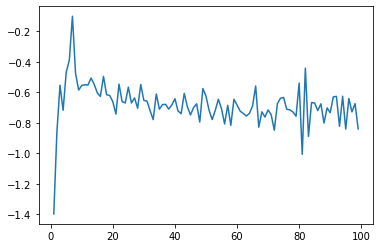

In [57]:
(diffs - diffs.shift(1)).plot()

<AxesSubplot:>

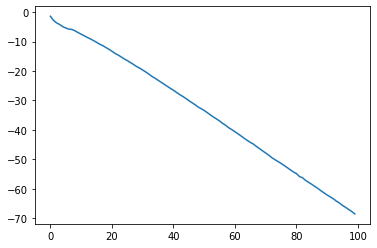

In [43]:
diffs.plot()

In [ ]:
# Try with baseline metric functions

In [27]:
G_brand_embs(0)
G_category_embs(0)
G_colour_embs(0)
G_div_embs(0)
G_itemcat_embs(0)
G_itemfam_embs(0)
G_season_embs(0)
G_prod_embs(0)

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-0.01528735, -0.11605564, -0.0677366 ,  0.07035215,  0.06171633,
       -0.10844038, -0.13454585, -0.25683078,  0.07253584, -0.13466115,
       -0.12068694, -0.01514214, -0.15511733,  0.01069139,  0.0382417 ,
       -0.1363697 ,  0.21189529,  0.09631862, -0.05128156, -0.01761855,
        0.07768512, -0.07682421,  0.04833014, -0.07011563, -0.04009328,
       -0.0637093 , -0.03538469, -0.10249022, -0.09990829,  0.04847763,
        0.09975258, -0.11815249,  0.07830128, -0.06967121, -0.00733658,
       -0.05188571, -0.12428847, -0.13059792, -0.0737626 , -0.0377024 ,
       -0.1015723 ,  0.05233473, -0.00874771,  0.0237248 ,  0.15101252,
        0.02378168,  0.12840454,  0.01683222, -0.19599509, -0.04296796],
      dtype=float32)>

In [31]:
print(np.array(G_brand_embs.get_weights()).shape,
np.array(G_category_embs.get_weights()).shape,
np.array(G_colour_embs.get_weights()).shape,
np.array(G_div_embs.get_weights()).shape,
np.array(G_itemcat_embs.get_weights()).shape,
np.array(G_itemfam_embs.get_weights()).shape,
np.array(G_season_embs.get_weights()).shape,
np.array(G_prod_embs.get_weights()).shape)

(1, 310, 50) (1, 8, 50) (1, 53, 50) (1, 3, 50) (1, 13, 50) (1, 4, 50) (1, 3, 50) (1, 78, 50)


In [32]:
np.save("embeddings/Product_embs",np.array(G_prod_embs.weights[0]))
np.save("embeddings/brand_embs",np.array(G_brand_embs.weights[0]))
np.save("embeddings/category_embs",np.array(G_category_embs.weights[0]))
np.save("embeddings/colour_embs",np.array(G_colour_embs.weights[0]))
np.save("embeddings/div_embs",np.array(G_div_embs.weights[0]))
np.save("embeddings/itemcat_embs",np.array(G_itemcat_embs.weights[0]))
np.save("embeddings/itemfam_embs",np.array(G_itemfam_embs.weights[0]))
np.save("embeddings/season_embs",np.array(G_season_embs.weights[0]))